# Constrained Optimization

1. Equality Constrained Optimization
    * Lagrange multiplier
2. Inequality Constrained Optimization
    * [Steepest descent](#first-bullet1)
    * [Newton's method](#first-bullet2)
    * Quasi-Newton method
        * Broyden-Fletcher-Goldfarb-Shanno (BFGS)
        * Penalty method


## Steepest descent <a class="anchor" id="first-bullet1"></a>

The negative gradient $- \nabla f(x)$ points in the "steepest downhill" direction for $f$ at $x$. The minimized $f$ is obtained by following $- \nabla f(x)$ at each step. We find the best step size by solving an optimization problem: 

For a direction $s \in \mathbb{R}^n$, let $\phi: \mathbb{R} \rightarrow \mathbb{R}$ be given by $\phi(\eta) = f(x + \eta s)$. Then minimizing $f$ along $s$ direction corresponds to minimizing the one-dimensional function $\phi$. This is called a **line search**.

The pseudocode of the steepest method is as follows:

> 1 choose initial guess $x_0$
>
> 2 **for** $k = 0,1,2,...$ **do**
> 
> 3 $\quad$ $s_k = - \nabla f(x_k)$
>   
> 4 $\quad$ choose $\eta_k$ to minimize $f(x_j + \eta_k s_k)$
>  
> 5 $\quad$ $x_{k+1} = x_k + \eta_k s_k$
> 
> 6 **end for**

## Newton's method <a class="anchor" id="first-bullet2"></a>

We can use Newton's method to solve it with quadratic convergence. The Newton's method can be considered as seeking stationary point based on a sequence of local quadratic approximations (2nd-order Taylor expansion).

For a small $\delta$, we take a Taylor expansion at a point,

$$
f(x + \delta) \approx f(x) + \nabla f(x)^T \delta + {1\over 2} \delta^T H_f(x) \delta = q(\delta)
$$

where $q(\delta)$ is quadratic in $\delta$ (for a fixed $x$).

To find the stationary point of $q$, we take the gradient of $q(\delta)$ with respect to $\delta$, and set it to zero,

$$
\nabla q(\delta) = \nabla f(x) + H_f(x) \delta = 0
$$

This leads to $H_f(x) \delta = - \nabla f(x)$.


The simplified pseudocode of the Newton's method is as follows:

> 1 choose initial guess $x_0$
>
> 2 **for** $k=0,1,2,...$ **do**
>
> 3 $\quad$ solve $H_f(x_k)s_k = - \nabla f(x_k)$
> 
> 4 $\quad$ $x_{k+1} = x_k + s_k$
>
> 5 **end for**

Note that although the Newton's method generally converges very fast, it can be unreliable far away from a solution. It is common to perform a **line search** in the Newton-step-direction to improve the robustness during early iterations. This refers to **damped Newton Method**. Besides, the Newton's method can be expensive due to the computational complexity of calculating Hessian matrix $H_f$.

### Newton's method for minimizing Himmelblau's function

$$
f(x,y) = (x^2 + y -11)^2 + (x+y^2-7)^2
$$


From the 3d plot we can see that Himmelblau function has four local minima and one maximum.

In [1]:
import numpy as np

# Himmelblau function
def f(x,y):
    return (x*x+y-11)**2+(x+y*y-7)**2

# Gradient of the Himmelblau function
def grad_f(x,y):
    return np.array([4*x*(x*x+y-11)+2*(x+y*y-7),2*(x*x+y-11)+4*y*(x+y*y-7)])

# Hessian of the Himmelblau function
def hess_f(x,y):
    return np.array([[4*(x*x+y-11)+8*x*x+2,4*x+4*y],[4*x+4*y,2+4*(x+y*y-7)+8*y*y]])

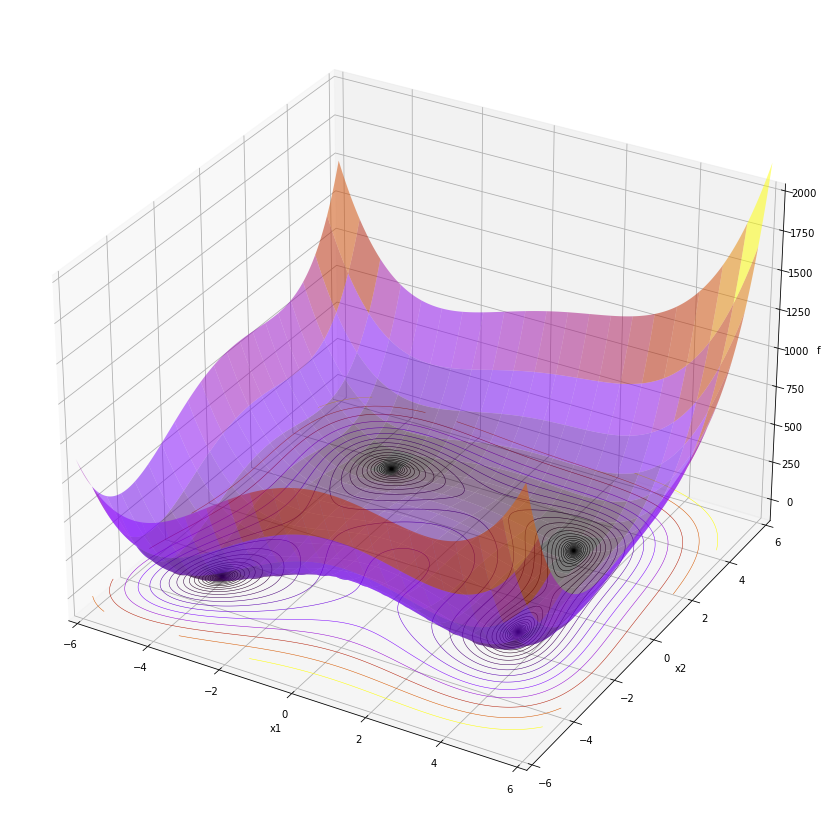

In [2]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

# plotting
ax=plt.figure(figsize=(20,15)).add_subplot(projection='3d')
x1 = np.linspace(-6,6,1000)
x2 = np.linspace(-6,6,1000)
X1, X2 = np.meshgrid(x1,x2)

# plot 3d surface
ax.plot_surface(X1,X2,f(X1,X2), rstride=50, cstride=50, alpha=0.5, cmap=plt.cm.gnuplot)

# plot a projection of the contours for the z dimension.
levels = np.logspace(-3,3,40)
ax.contour(X1,X2, f(X1,X2), zdir='z', offset=-50, linewidths=0.5,
          levels = levels, cmap=plt.cm.gnuplot)

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-100,2000)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f')

plt.show()


Let's use Newton's method to find a local minimum, starting from a random guess (8,8), looping through several Newton steps until the step is small enough ($\delta \leq 10^{-16}$). We can see from the print-out and the 3d figure that the quadratic convergence is very fast.

In [3]:
# Find minimum using Newton's method
x=np.array([8,8])
s=1e10
print(x[0],x[1],f(x[0],x[1]))

xs0 = []
xs1 = []
fs = []

while np.linalg.norm(s)>1e-16:

    # Take a Newton step by solving the linear system constructed using the Hessian and gradient
    s=np.linalg.solve(hess_f(x[0],x[1]),-grad_f(x[0],x[1]))
    x=x+s

    # Print the components of the current position and the norm of the gradient
    print(x[0],x[1],f(x[0],x[1]),np.linalg.norm(s))
    xs0.append(x[0])
    xs1.append(x[1])
    fs.append(f(x[0],x[1]))

8 8 7946
5.475883802841077 5.363751210100997 1335.2052210296583 3.649790440423119
3.9558569298443143 3.7006615881461755 183.1521184519786 2.2530754060364124
3.187071928557471 2.7223840706253353 16.482511956708287 1.2442094998392956
2.9742478120425835 2.221433433658367 0.8308745467341618 0.5442845260045093
2.9925434710963343 2.030968750709943 0.013965582666255437 0.19134138755338517
2.999843708918757 2.000721299296623 7.496607165258944e-06 0.031115941079534998
2.999999909457226 2.0000004083718723 2.3988728088903323e-12 0.000737619369055319
2.999999999999971 2.0000000000001306 2.456828403220319e-25 4.1828873763805387e-07
3.0 1.9999999999999998 7.888609052210118e-31 1.33832392272928e-13
3.0 2.0 0.0 2.3489471354658304e-16
3.0 2.0 0.0 0.0


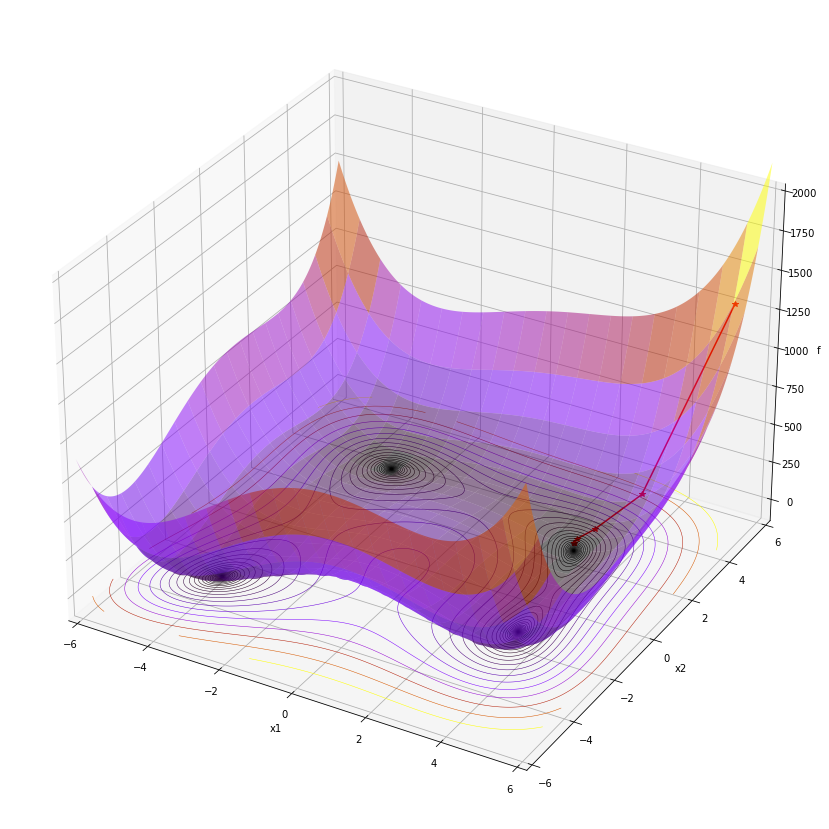

In [4]:
# plotting
ax=plt.figure(figsize=(20,15)).add_subplot(projection='3d')
x1 = np.linspace(-6,6,1000)
x2 = np.linspace(-6,6,1000)
X1, X2 = np.meshgrid(x1,x2)

# plot 3d surface
ax.plot_surface(X1,X2,f(X1,X2), rstride=50, cstride=50, alpha=0.5, cmap=plt.cm.gnuplot)

# plot a projection of the contours for the z dimension.
levels = np.logspace(-3,3,40)
ax.contour(X1,X2, f(X1,X2), zdir='z', offset=-50, linewidths=0.5,
          levels = levels, cmap=plt.cm.gnuplot)
ax.plot(xs0,xs1,fs, color='r', marker='*')

ax.set_xlim(-6,6)
ax.set_ylim(-6,6)
ax.set_zlim(-100,2000)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f')

plt.show()